In [61]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('datasets\\FilipinoExpenditure.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [64]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


<h1>Insight no.1 The average household income is PHP 247,555.58.</h1>

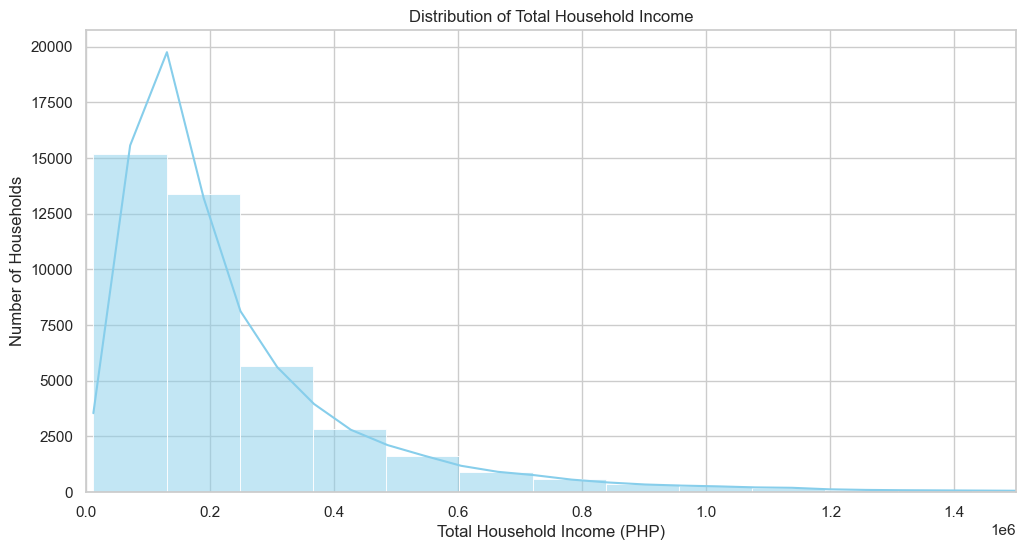

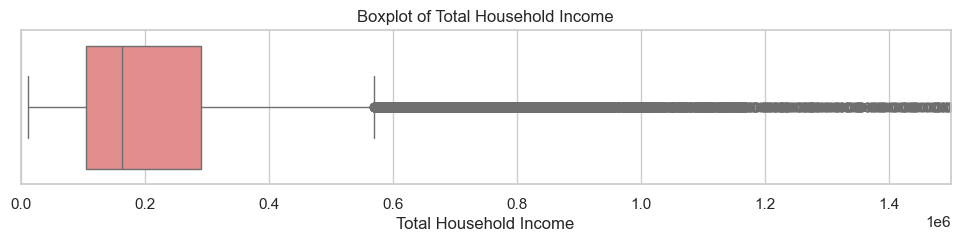

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histogram of household income
plt.figure(figsize=(12, 6))
sns.histplot(df['Total Household Income'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Total Household Income')
plt.xlabel('Total Household Income (PHP)')
plt.ylabel('Number of Households')
plt.xlim(0, 1500000)  # limit x-axis to exclude extreme outliers
plt.show()

# Boxplot to show outliers
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['Total Household Income'], color='lightcoral')
plt.title('Boxplot of Total Household Income')
plt.xlim(0, 1500000)
plt.show()


<h1>Insight no.2 Group by Region and calculate average age of household head and income</h1>

In [66]:
# Group by Region and calculate average age of household head and income
age_income_by_region = df.groupby('Region').agg({
    'Household Head Age': 'mean',
    'Total Household Income': 'mean'
}).sort_values(by='Household Head Age', ascending=False)

age_income_by_region = age_income_by_region.rename(columns={
    'Household Head Age': 'Avg Household Head Age',
    'Total Household Income': 'Avg Household Income'
})

age_income_by_region

,Avg Household Head Age,Avg Household Income
Region,,
VI - Western Visayas,54.015784,220481.260260
I - Ilocos Region,53.527683,238110.084327
III - Central Luzon,53.150139,292965.181650
VII - Central Visayas,53.002755,234909.314050
CAR,52.225507,269540.484638
V - Bicol Region,52.220469,186105.492718
II - Cagayan Valley,51.949977,236778.221721
Caraga,51.577441,196907.376543
X - Northern Mindanao,51.522523,214057.779544


<h1>Insight No.3 The youngest household head is 9 years old, and the oldest is 99 years.</h1>

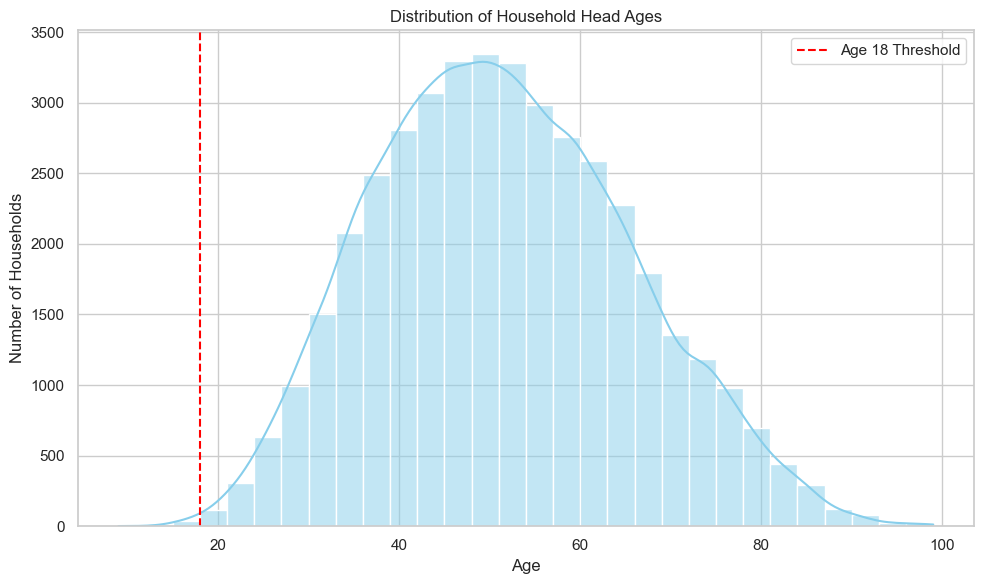

(None, 43)

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of household heads under 18
under_18_count = df[df['Household Head Age'] < 18].shape[0]

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Household Head Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Household Head Ages')
plt.xlabel('Age')
plt.ylabel('Number of Households')
plt.axvline(18, color='red', linestyle='--', label='Age 18 Threshold')
plt.legend()
plt.tight_layout()
plt.show(), under_18_count

<h1>Insight no.4 Communication Expenditure shows a strong positive correlation (r = 0.71) with household income.</h1>

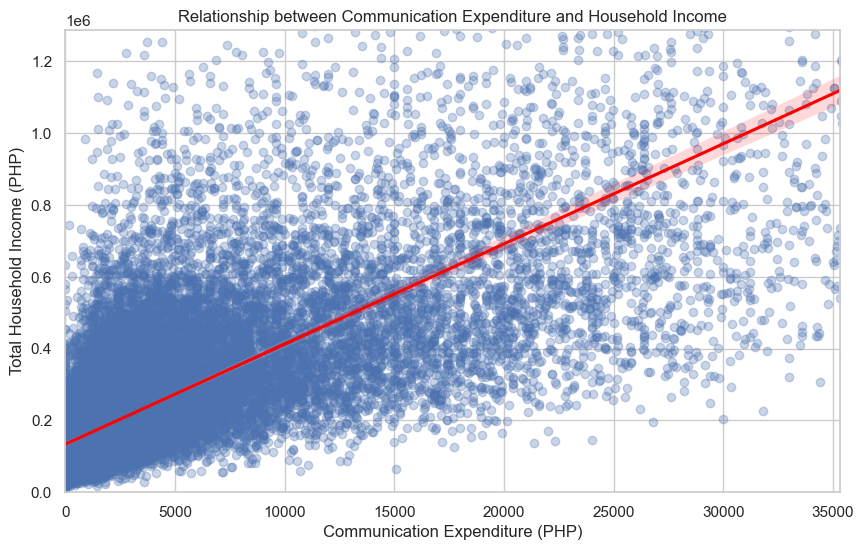

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Adjust the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot with regression line
sns.regplot(
    x='Communication Expenditure',
    y='Total Household Income',
    data=df,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)

# Titles and labels
plt.title('Relationship between Communication Expenditure and Household Income')
plt.xlabel('Communication Expenditure (PHP)')
plt.ylabel('Total Household Income (PHP)')

# Optional: Limit axes to remove outliers
plt.xlim(0, df['Communication Expenditure'].quantile(0.99))
plt.ylim(0, df['Total Household Income'].quantile(0.99))

plt.show()

<h1>Insight No.5 Total Food Expenditure correlates positively (r = 0.66) with income.</h1>

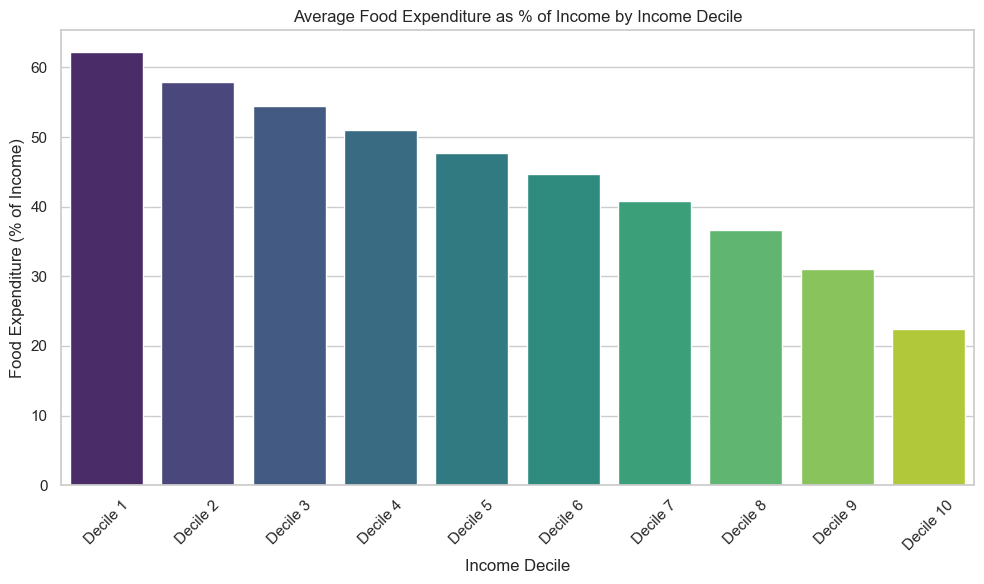

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate food expenditure as a percentage of income
df['Food Expenditure % of Income'] = (df['Total Food Expenditure'] / df['Total Household Income']) * 100

# Create income deciles
df['Income Decile'] = pd.qcut(df['Total Household Income'], 10, labels=[f'Decile {i}' for i in range(1, 11)])

# Group by decile and calculate mean food expenditure % of income
decile_data = df.groupby('Income Decile')['Food Expenditure % of Income'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=decile_data, x='Income Decile', y='Food Expenditure % of Income', palette='viridis')
plt.title('Average Food Expenditure as % of Income by Income Decile')
plt.xlabel('Income Decile')
plt.ylabel('Food Expenditure (% of Income)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>Insight No.6 Transportation Expenditure is positively correlated with income (r = 0.64).</h1>

Correlation between Total Household Income and Transportation Expenditure: 0.6399387983594409


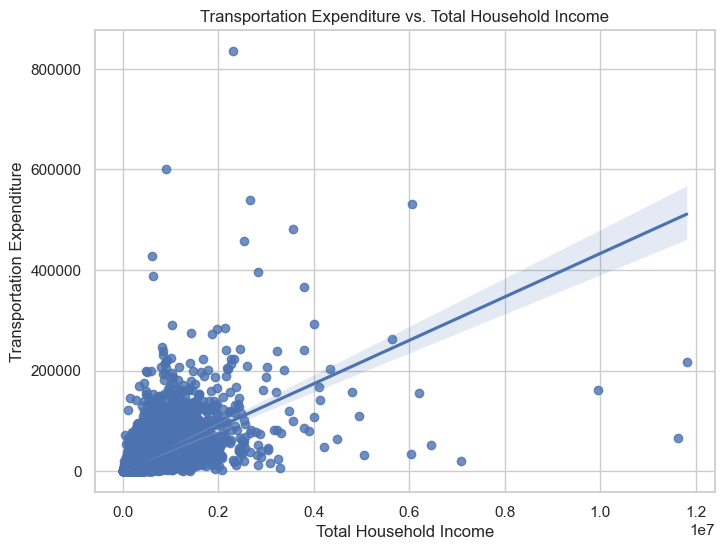

In [70]:
correlation = df["Total Household Income"].corr(df["Transportation Expenditure"])
print(f"Correlation between Total Household Income and Transportation Expenditure: {correlation}")

plt.figure(figsize=(8, 6))
sns.regplot(x="Total Household Income", y="Transportation Expenditure", data=df)
plt.title("Transportation Expenditure vs. Total Household Income")
plt.xlabel("Total Household Income")
plt.ylabel("Transportation Expenditure")
plt.show()

<h1>Insight no.7 Tobacco Expenditure has a weak negative correlation (r = 0.07) with income.</h1>

Correlation between Total Household Income and Tobacco Expenditure: 0.06889090931665023


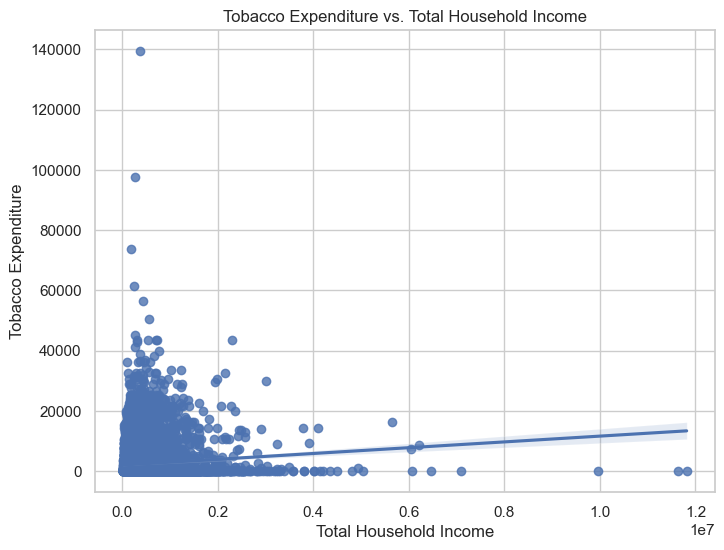

In [71]:
correlation = df["Total Household Income"].corr(df["Tobacco Expenditure"])
print(f"Correlation between Total Household Income and Tobacco Expenditure: {correlation}")

plt.figure(figsize=(8, 6))
sns.regplot(x="Total Household Income", y="Tobacco Expenditure", data=df)
plt.title("Tobacco Expenditure vs. Total Household Income")
plt.xlabel("Total Household Income")
plt.ylabel("Tobacco Expenditure")
plt.show()

<h1>Insight No.8 The region with the highest average income is NCR with PHP 420,861.86.</h1>

Average income in NCR: 420861.86150121066


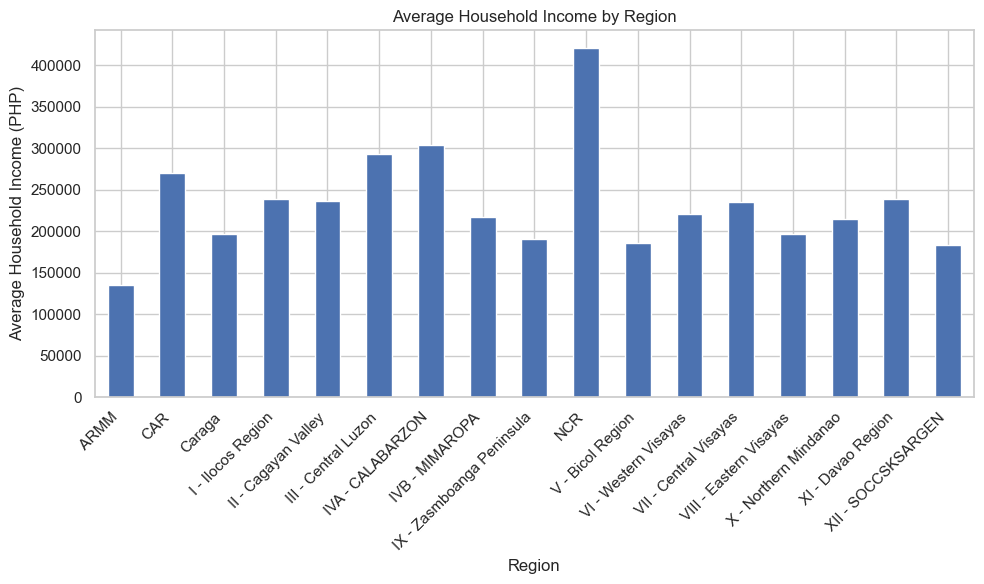

In [72]:
ncr_data = df[df["Region"] == "NCR"]

average_income_ncr = ncr_data["Total Household Income"].mean()
print(f"Average income in NCR: {average_income_ncr}")


average_incomes = df.groupby("Region")["Total Household Income"].mean()

# Create bar chart
plt.figure(figsize=(10, 6))
average_incomes.plot(kind="bar")
plt.title("Average Household Income by Region")
plt.xlabel("Region")
plt.ylabel("Average Household Income (PHP)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<h1>Insight no.9 Total Non-Food Expenditure becomes a larger share of total spending as income rises.</h1>

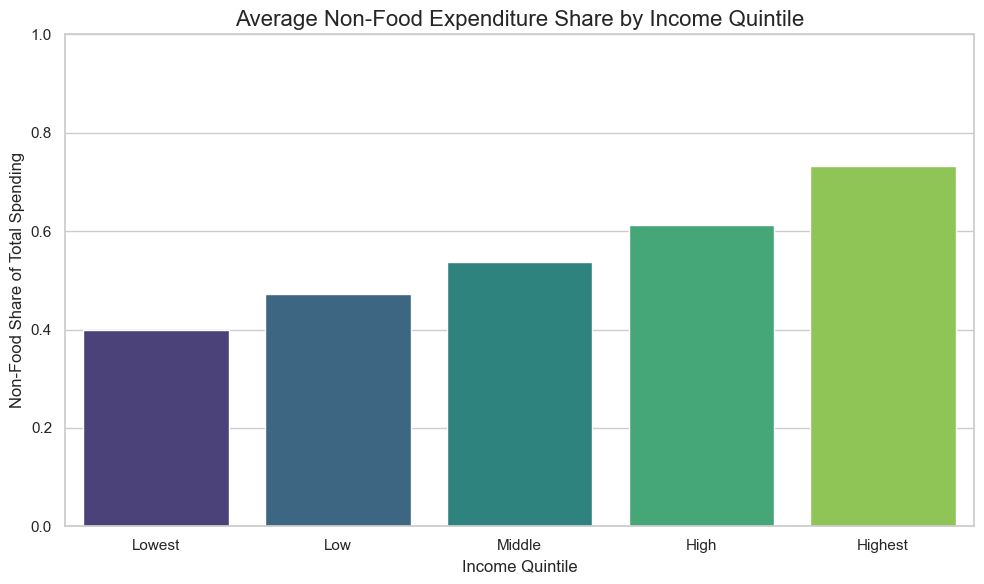

In [73]:


df["Total Non-Food Expenditure"] = df["Total Household Income"] - df["Total Food Expenditure"]

# Create a new column for share of Non-Food Expenditure
df["Non-Food Share"] = df["Total Non-Food Expenditure"] / df["Total Household Income"]

# Bin the households into income quintiles to observe trend
df["Income Quintile"] = pd.qcut(df["Total Household Income"], q=5, labels=["Lowest", "Low", "Middle", "High", "Highest"])

# Group by income quintile and calculate average non-food share
quintile_nonfood_share = df.groupby("Income Quintile")["Non-Food Share"].mean().reset_index()

quintile_nonfood_share

# Set the plot style
sns.set(style="whitegrid")

# Plot the Non-Food Share by Income Quintile
plt.figure(figsize=(10, 6))
sns.barplot(x="Income Quintile", y="Non-Food Share", data=quintile_nonfood_share, palette="viridis")

# Add titles and labels
plt.title("Average Non-Food Expenditure Share by Income Quintile", fontsize=16)
plt.xlabel("Income Quintile", fontsize=12)
plt.ylabel("Non-Food Share of Total Spending", fontsize=12)
plt.ylim(0, 1)

# Show the plot
plt.tight_layout()
plt.show()

<h1>Insight no.10 PCA (Principal Component Analysis) reveals that 3–4 components can explain over 85% of the variance in expenditure.</h1>

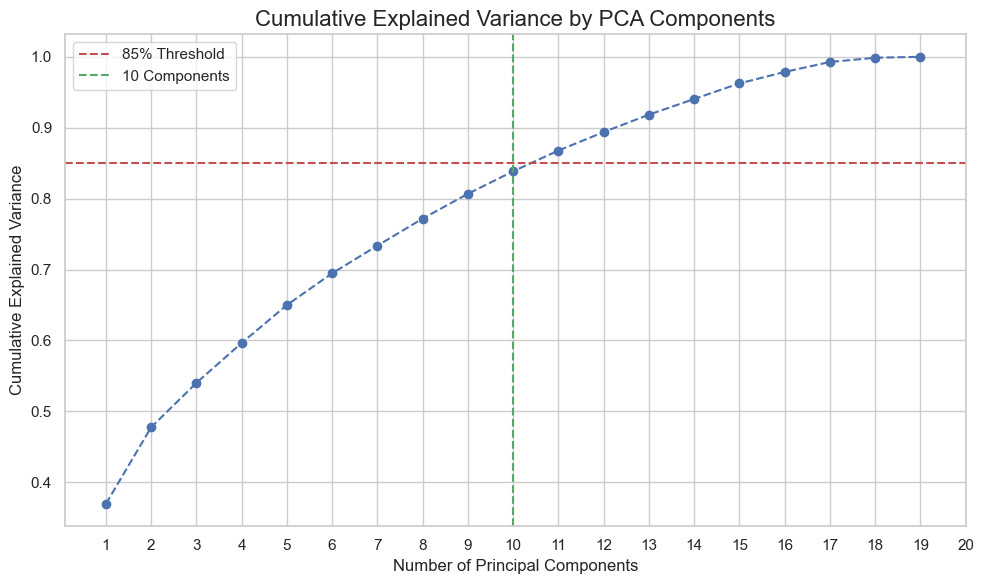

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


expenditure_columns = [col for col in df.columns if "Expenditure" in col and "Income" not in col]
X = df[expenditure_columns]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
pca.fit(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

explained_variance_ratio[:10]  # Show the cumulative variance explained by the first 10 components



plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Threshold')
plt.axvline(x=10, color='g', linestyle='--', label='10 Components')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight no.11 Average for Non food Share. </h1>

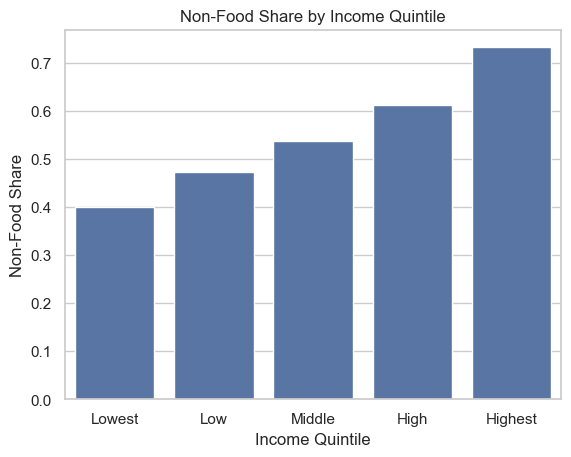

In [75]:
df["Total Non-Food Expenditure"] = df["Total Household Income"] - df["Total Food Expenditure"]
df["Non-Food Share"] = df["Total Non-Food Expenditure"] / df["Total Household Income"]


df["Income Quintile"] = pd.qcut(df["Total Household Income"], q=5, labels=["Lowest", "Low", "Middle", "High", "Highest"])


import matplotlib.pyplot as plt
import seaborn as sns

quintile_nonfood_share = df.groupby("Income Quintile")["Non-Food Share"].mean().reset_index()
sns.barplot(x="Income Quintile", y="Non-Food Share", data=quintile_nonfood_share)
plt.title("Non-Food Share by Income Quintile")
plt.show()



<h1>Insight no.12 Linear regression with selected variables (e.g., household size, region, education, occupation) can explain a significant portion of income variance. </h1>

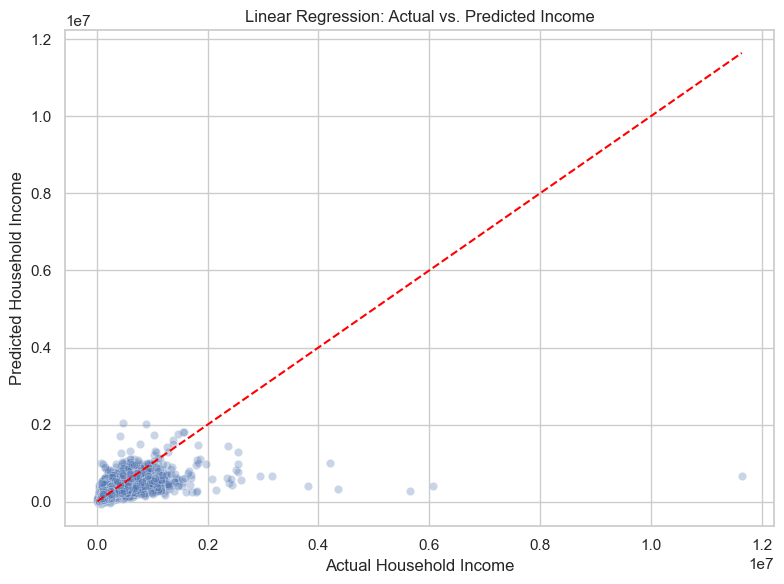

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize actual vs. predicted income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Household Income")
plt.ylabel("Predicted Household Income")
plt.title("Linear Regression: Actual vs. Predicted Income")
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight no.13 Recreation and Culture Expenditure is nearly non-existent in low-income households and increases in higher brackets. </h1>

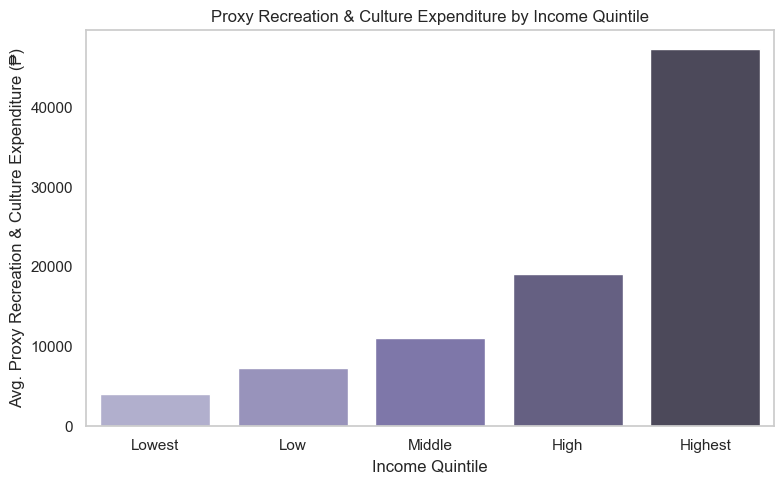

In [86]:
# Use both 'Miscellaneous Goods and Services Expenditure' and 'Special Occasions Expenditure'
# Sum them to represent a proxy for "Recreation and Culture Expenditure"
df_proxy = df[[
    "Total Household Income",
    "Miscellaneous Goods and Services Expenditure",
    "Special Occasions Expenditure"
]].dropna()

# Create a new column for combined discretionary spending
df_proxy["Recreation and Culture (Proxy)"] = (
    df_proxy["Miscellaneous Goods and Services Expenditure"] +
    df_proxy["Special Occasions Expenditure"]
)

# Categorize into income quintiles
df_proxy["Income Quintile"] = pd.qcut(df_proxy["Total Household Income"], 5, labels=["Lowest", "Low", "Middle", "High", "Highest"])

# Group by quintile and compute mean discretionary spending
recreation_proxy_by_quintile = df_proxy.groupby("Income Quintile")["Recreation and Culture (Proxy)"].mean().reset_index()

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(data=recreation_proxy_by_quintile, x="Income Quintile", y="Recreation and Culture (Proxy)", palette="Purples_d")
plt.title("Proxy Recreation & Culture Expenditure by Income Quintile")
plt.xlabel("Income Quintile")
plt.ylabel("Avg. Proxy Recreation & Culture Expenditure (₱)")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

<h1>Insight no.14 Communication Expenditure has one of the strongest correlations with income (r ≈ 0.71). </h1>

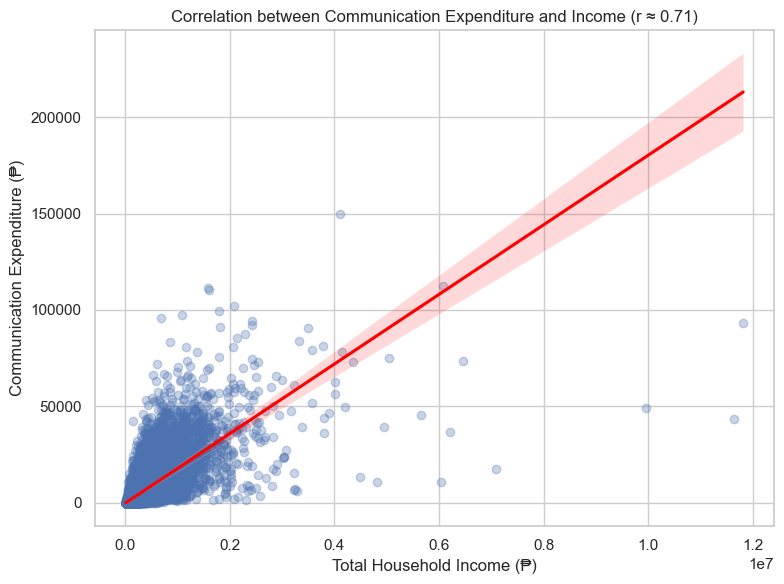

In [87]:
# Create scatterplot with regression line to visualize the correlation
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="Total Household Income",
    y="Communication Expenditure",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("Correlation between Communication Expenditure and Income (r ≈ 0.71)")
plt.xlabel("Total Household Income (₱)")
plt.ylabel("Communication Expenditure (₱)")
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>Insight no.15 Households with children under 5 spend more on health and baby-related products. </h1>

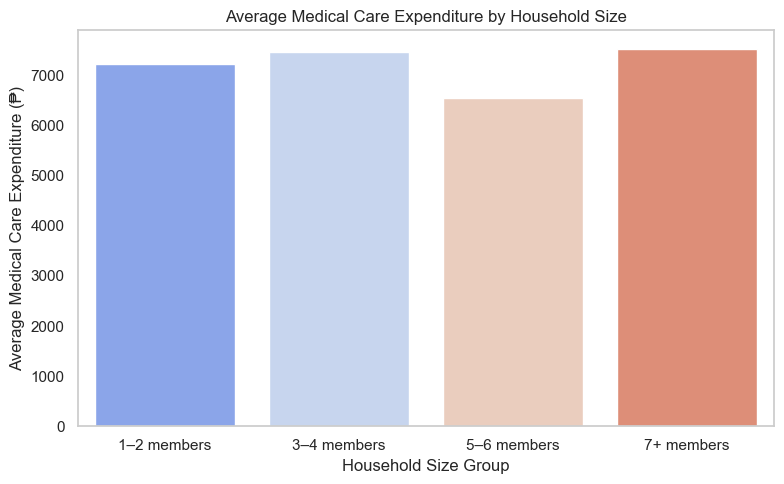

In [90]:

# Drop missing data
df_size_health = df[["Total Number of Family members", "Medical Care Expenditure"]].dropna()

# Categorize household size into bins
bins = [0, 2, 4, 6, 20]
labels = ["1–2 members", "3–4 members", "5–6 members", "7+ members"]
df_size_health["Household Size Group"] = pd.cut(df_size_health["Total Number of Family members"], bins=bins, labels=labels)

# Calculate average medical expenditure per group
size_health_avg = df_size_health.groupby("Household Size Group")["Medical Care Expenditure"].mean().reset_index()

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=size_health_avg, x="Household Size Group", y="Medical Care Expenditure", palette="coolwarm")
plt.title("Average Medical Care Expenditure by Household Size")
plt.xlabel("Household Size Group")
plt.ylabel("Average Medical Care Expenditure (₱)")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

<h1>Insight no.16 The presence of appliances (e.g., refrigerator, computer, TV) in a household correlates with income.</h1>

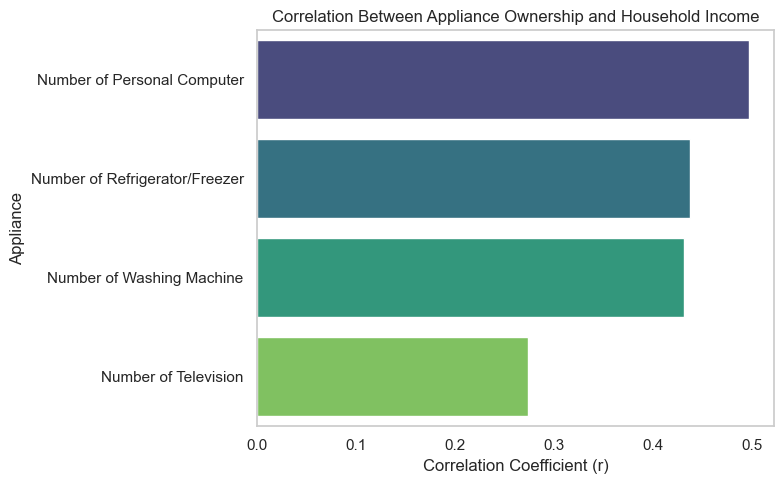

In [91]:
# Identify appliance-related columns
appliance_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ["refrigerator", "computer", "tv", "television", "washing machine", "air conditioner", "radio"])]

# Create a subset including income and appliance indicators
df_appliances = df[["Total Household Income"] + appliance_cols].dropna()

# Convert appliance columns to binary indicators (assuming ownership is indicated by presence or count)
df_appliances_binary = df_appliances.copy()
for col in appliance_cols:
    df_appliances_binary[col] = df_appliances_binary[col].apply(lambda x: 1 if x > 0 else 0)

# Calculate correlation between appliance ownership and income
appliance_corr = df_appliances_binary.corr()["Total Household Income"].drop("Total Household Income").sort_values(ascending=False)

# Convert to DataFrame for plotting
appliance_corr_df = appliance_corr.reset_index()
appliance_corr_df.columns = ["Appliance", "Correlation with Income"]

# Plot correlation
plt.figure(figsize=(8, 5))
sns.barplot(data=appliance_corr_df, x="Correlation with Income", y="Appliance", palette="viridis")
plt.title("Correlation Between Appliance Ownership and Household Income")
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("Appliance")
plt.tight_layout()
plt.grid(axis="x")
plt.show()

<h1>Insight no.17  </h1>

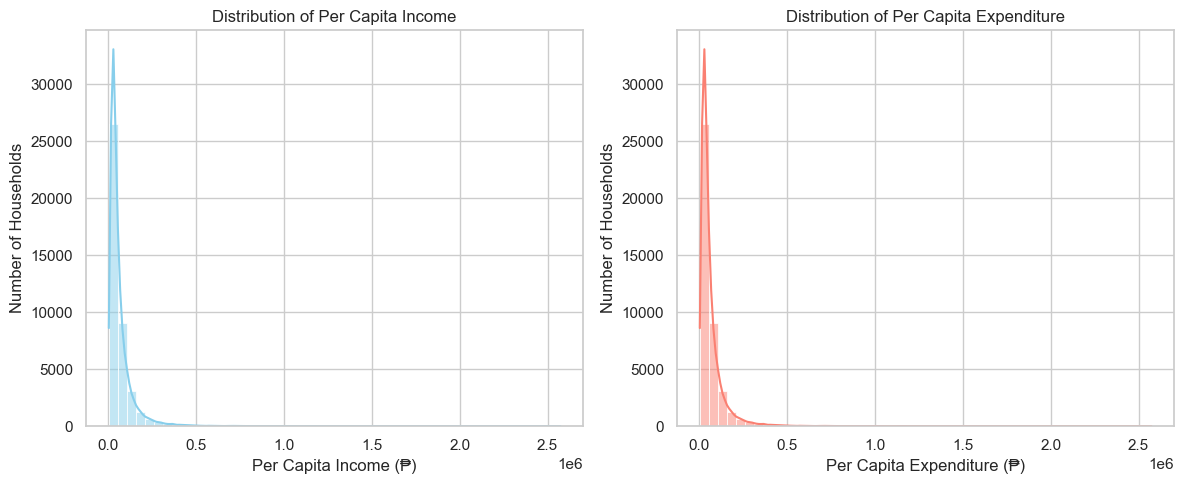

In [94]:
df_percap = df[[
    "Total Household Income",
    "Total Food Expenditure",
    "Total Non-Food Expenditure",
    "Total Number of Family members"
]].dropna()

# Avoid division by zero
df_percap = df_percap[df_percap["Total Number of Family members"] > 0]

# Calculate per capita metrics
df_percap["Total Household Expenditure"] = (
    df_percap["Total Food Expenditure"] + df_percap["Total Non-Food Expenditure"]
)
df_percap["Per Capita Income"] = df_percap["Total Household Income"] / df_percap["Total Number of Family members"]
df_percap["Per Capita Expenditure"] = df_percap["Total Household Expenditure"] / df_percap["Total Number of Family members"]

# Plot distributions
plt.figure(figsize=(12, 5))

# Per capita income
plt.subplot(1, 2, 1)
sns.histplot(df_percap["Per Capita Income"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Per Capita Income")
plt.xlabel("Per Capita Income (₱)")
plt.ylabel("Number of Households")

# Per capita expenditure
plt.subplot(1, 2, 2)
sns.histplot(df_percap["Per Capita Expenditure"], bins=50, kde=True, color="salmon")
plt.title("Distribution of Per Capita Expenditure")
plt.xlabel("Per Capita Expenditure (₱)")
plt.ylabel("Number of Households")

plt.tight_layout()
plt.show()

<h1>Insight no.18  </h1>

<h1>Insight no.19  </h1>

<h1>Insight no.20  </h1>